In [1]:
# Importing libraries

'''
To import any module, run following command in ipynb
import sys
!{sys.executable} -m pip install wordcloud
'''

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
# Function to find cosine similarity between two vectors tfidf_1, tfidf_2

def cosine_similarity(tfidf_1, tfidf_2):
    return cosine(tfidf_1.todense(),tfidf_2.todense())

In [3]:
# function to find accuracy by determing confusion mastrix

def accuracy(similarity, data, threshold):
    similar = list( [1 if i>threshold else 0 for i in similarity] )
    X = list(data['is_duplicate'])
    false_pos =0
    false_neg=0
    true_pos=0
    true_neg=0

    for i in range(0, len(X)):
        if(X[i]== similar[i]):
            if X[i]==1:
                true_pos =1+true_pos
            else:
                true_neg = 1+true_neg
        else:
            if X[i]==1:
                false_neg =1+false_neg
            else:
                false_pos  = 1+false_pos
        
    acc = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
    acc*=100
    return acc    

In [4]:
x = np.linspace(0,1,15)

In [9]:
# Reading data
data = pd.read_csv("quora_duplicate_questions.tsv", sep="\t")
#data.isnull().values.ravel().sum()

In [10]:
# cleaning of the data

from ipynb.fs.full.Data_preprocessing import clean

data['question1'] = data['question1'].apply(clean)
data['question2'] = data['question2'].apply(clean)

#data.isnull().values.ravel().sum()

#data1 = pd.read_csv('CleanData.csv')
#data1.isnull().values.ravel().sum()

In [11]:
data.to_csv('CleanData.tsv',index=False,sep='\t')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0


In [12]:
# Splitting the dataset
print(data.describe())
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 0)
data.head()

                  id           qid1           qid2   is_duplicate
count  404290.000000  404290.000000  404290.000000  404290.000000
mean   202144.500000  217243.942418  220955.655337       0.369198
std    116708.614503  157751.700002  159903.182629       0.482588
min         0.000000       1.000000       2.000000       0.000000
25%    101072.250000   74437.500000   74727.000000       0.000000
50%    202144.500000  192182.000000  197052.000000       0.000000
75%    303216.750000  346573.500000  354692.500000       1.000000
max    404289.000000  537932.000000  537933.000000       1.000000


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0


In [13]:
'''
Vectorizing the text is what allows us to have numerical representation of
text that we can work with.

To vectorize text is to represent text as numerical vectors.
We create vocabulary set: the vocabulary set contains all words that occur 
throughout the corpus.

we can represent each sentence as a vector comprised of the number of times certain 
words from the set V occurs in each sentence, where each component 
corresponds to the index of that word in the vocabulary set. 
This model is what is called a Vector Space Model.

'''

#Countvectorizer : Convert a collection of text documents to a matrix of token counts


vectorizer = CountVectorizer( max_features = 50000)
X = vectorizer.fit_transform(pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique())
#print(vectorizer.get_feature_names())

In [14]:
# Wordcloud formed using bag of wwords
#words = vectorizer.get_feature_names()
#cloud = WordCloud(width=1440, height=1080).generate(" ".join(words))
#plt.figure(figsize=(20, 15))
#plt.imshow(cloud)
#plt.axis('off')

In [15]:
#unigram tfidf 

'''
Term Frequency (tf): gives us the frequency of the word in each document in the corpus. 
It is the ratio of number of times the word appears in a document compared to the total 
number of words in that document. It increases as the number of occurrences of that word 
within the document increases. Each document has its own tf.

Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents 
in the corpus. The words that occur rarely in the corpus have a high IDF score.

Combining these two we come up with the TF-IDF score for a word in a document in the corpus.
It is the product of tf and idf:


'''
tfidf_vect = TfidfVectorizer(max_features = 50000)
tfidf_vect.fit( pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique() )
tfidf_train_1 = tfidf_vect.transform(train_data['question1'])
tfidf_train_2 = tfidf_vect.transform(train_data['question2'])

tfidf_test_1 = tfidf_vect.transform(test_data['question1'])
tfidf_test_2 = tfidf_vect.transform(test_data['question2'])

In [16]:
# similarity between two questions in both datasets and accuracy obtained on different thresholds
'''
similarity is calculated between two questions using cosine similarity and tfidf vectors.
tfidf vectors are fitted on training data set and then transformed for question1 and question2. 
Using the vectors of question1 and question2 and cosine similarity, similarity is calculated between 
question1 and question2. 

To calculate accuracy, we considered a threshold value for which if similarity > threshold,
quesstions are similar, otherwise not. Now using the original data['isduplicate'], we check for:

True_pos  = A true positive is an outcome where the model correctly predicts the positive class
True_neg  = A true negative is an outcome where the model correctly predicts the negative class.
False_pos = A false positive is an outcome where the model incorrectly predicts the positive class. 
False_neg = A false negative is an outcome where the model incorrectly predicts the negative class.

accuracy is calculated as (total umber of correct predictions)/(total number of predictions done)

accuracy is calculated for different threshold values for both test and training data sets.

'''
similarity_train = []

for i in range(0, tfidf_train_1.shape[0]):
    similarity_train.append(cosine_similarity(tfidf_train_1[i], tfidf_train_2[i]))    
    

similarity_test = []

for i in range(0, tfidf_test_1.shape[0]):
    similarity_test.append(cosine_similarity(tfidf_test_1[i], tfidf_test_2[i]))    
    


/home/stud/btech/cse/2017/rahul.cs17/anaconda3/envs/rahul/lib/python3.6/site-packages/scipy/spatial/distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [17]:
accuracy_train = []
for i in x:
    accuracy_train.append(accuracy(similarity_train, train_data, i))

accuracy_test = []

for i in x:
    accuracy_test.append(accuracy(similarity_test, test_data, i))
    


Threshold      accuracy_train   accuracy_test
0.000000       36.759681       37.038594      
0.071429       34.955106       35.389613      
0.142857       34.536736       34.887498      
0.214286       34.962174       35.394560      
0.285714       34.796098       35.205752      
0.357143       34.145928       34.505759      
0.428571       33.657240       34.066306      
0.500000       33.927202       34.383734      
0.571429       35.451214       35.908218      
0.642857       38.404540       38.601004      
0.714286       42.417572       42.560208      
0.785714       46.898443       46.867348      
0.857143       50.718544       50.507474      
0.928571       53.210037       52.964456      
1.000000       63.132546       62.958108      


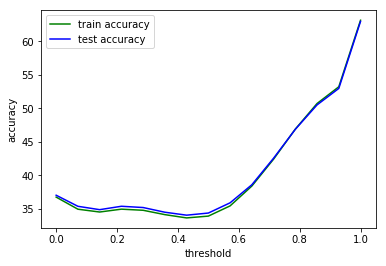

In [18]:
print("Threshold      accuracy_train   accuracy_test")   
for i in range(len(x)):
     print("{:<15f}{:<15f} {:<15f}".format(x[i], accuracy_train[i] ,accuracy_test[i] ))
        

   
plt.plot(x,accuracy_train, color='green', label='train accuracy')
plt.plot(x,accuracy_test, color='blue', label='test accuracy')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [19]:
f1_score_train = []

for i in x:
    
    print("Threshold: {:f}".format(i))
    
    predictions = list( [ 1 if y>i else 0 for y in similarity_train] )
    
    acc = accuracy_score(predictions ,train_data['is_duplicate'].values )
    print("Accuracy : {:f}".format(acc*100))
    
    cm = confusion_matrix(predictions ,train_data['is_duplicate'].values )
    print("Confusion Matrix")
    print(cm)
    
    f1 = f1_score(predictions ,train_data['is_duplicate'].values, average='macro')
    print("F1 Score: {:f}\n\n".format(f1))
    
    f1_score_train.append(f1)

Threshold: 0.000000
Accuracy : 36.759681
Confusion Matrix
[[  1301   1606]
 [177366 102730]]
F1 Score: 0.274391


Threshold: 0.071429
Accuracy : 34.955106
Confusion Matrix
[[  3977   9389]
 [174690  94947]]
F1 Score: 0.274597


Threshold: 0.142857
Accuracy : 34.536736
Confusion Matrix
[[ 11681  18277]
 [166986  86059]]
F1 Score: 0.296795


Threshold: 0.214286
Accuracy : 34.962174
Confusion Matrix
[[ 23140  28532]
 [155527  75804]]
F1 Score: 0.326292


Threshold: 0.285714
Accuracy : 34.796098
Confusion Matrix
[[ 33899  39761]
 [144768  64575]]
F1 Score: 0.340209


Threshold: 0.357143
Accuracy : 34.145928
Confusion Matrix
[[ 44162  51864]
 [134505  52472]]
F1 Score: 0.340891


Threshold: 0.428571
Accuracy : 33.657240
Confusion Matrix
[[ 55367  64452]
 [123300  39884]]
F1 Score: 0.334581


Threshold: 0.500000
Accuracy : 33.927202
Confusion Matrix
[[ 68316  76637]
 [110351  27699]]
F1 Score: 0.325376


Threshold: 0.571429
Accuracy : 35.451214
Confusion Matrix
[[83331 87339]
 [95336 16997]]

/home/stud/btech/cse/2017/rahul.cs17/anaconda3/envs/rahul/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [20]:
f1_score_test = []

for i in x:
    
    print("Threshold: {:f}".format(i))
    
    predictions = list( [ 1 if y>i else 0 for y in similarity_test] )
    
    acc = accuracy_score(predictions ,test_data['is_duplicate'].values )
    print("Accuracy : {:f}".format(acc*100))
    
    cm = confusion_matrix(predictions ,test_data['is_duplicate'].values )
    print("Confusion Matrix")
    print(cm)
    
    f1 = f1_score(predictions ,test_data['is_duplicate'].values, average='macro')
    print("F1 Score: {:f}\n\n".format(f1))
    
    f1_score_test.append(f1)

Threshold: 0.000000
Accuracy : 37.038594
Confusion Matrix
[[  677   681]
 [75683 44246]]
F1 Score: 0.277103


Threshold: 0.071429
Accuracy : 35.389613
Confusion Matrix
[[ 1920  3924]
 [74440 41003]]
F1 Score: 0.279034


Threshold: 0.142857
Accuracy : 34.887498
Confusion Matrix
[[ 5125  7738]
 [71235 37189]]
F1 Score: 0.299949


Threshold: 0.214286
Accuracy : 35.394560
Confusion Matrix
[[10188 12186]
 [66172 32741]]
F1 Score: 0.330807


Threshold: 0.285714
Accuracy : 35.205752
Confusion Matrix
[[14835 17062]
 [61525 27865]]
F1 Score: 0.344492


Threshold: 0.357143
Accuracy : 34.505759
Confusion Matrix
[[19306 22382]
 [57054 22545]]
F1 Score: 0.344590


Threshold: 0.428571
Accuracy : 34.066306
Confusion Matrix
[[24083 27692]
 [52277 17235]]
F1 Score: 0.338554


Threshold: 0.500000
Accuracy : 34.383734
Confusion Matrix
[[29638 32862]
 [46722 12065]]
F1 Score: 0.329768


Threshold: 0.571429
Accuracy : 35.908218
Confusion Matrix
[[36139 37514]
 [40221  7413]]
F1 Score: 0.320994


Threshold:

Threshold        f1_score_train         f1_score_test 
0.000000            0.274391             0.277103            
0.071429            0.274597             0.279034            
0.142857            0.296795             0.299949            
0.214286            0.326292             0.330807            
0.285714            0.340209             0.344492            
0.357143            0.340891             0.344590            
0.428571            0.334581             0.338554            
0.500000            0.325376             0.329768            
0.571429            0.316987             0.320994            
0.642857            0.312445             0.313959            
0.714286            0.313635             0.314751            
0.785714            0.323697             0.323746            
0.857143            0.337387             0.336884            
0.928571            0.347404             0.346555            
1.000000            0.387002             0.386345            


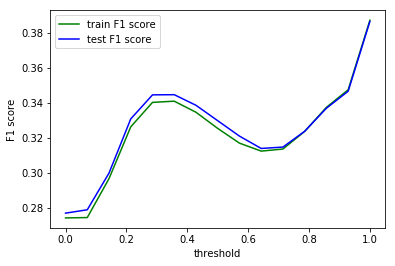

In [21]:
print("Threshold        f1_score_train         f1_score_test ")

for i in range(len(x)):
     print("{:<20f}{:<20f} {:<20f}".format(x[i], f1_score_train[i] , f1_score_test[i] ))
plt.plot(x, f1_score_train, color='green', label='train F1 score')
plt.plot(x, f1_score_test, color='blue', label='test F1 score')
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.legend()
plt.show()


In [22]:
#n-grams using tfidf and cosine similarity

'''
Ordering things differently can create the meaning of sentences dramatically.
n gram model lets you to to take into account the sequences of words not just singular words.
‘n’ in the n-gram approach represents a number, and it represents how many words there are in one gram
A bi-gram is a sequence of two words. 

'''

nvectorizer = CountVectorizer(ngram_range=(2,2), max_features = 50000)
X = nvectorizer.fit_transform(pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique())
print(nvectorizer.get_feature_names())

['04 lts', '10 10', '10 11', '10 15', '10 20', '10 am', '10 and', '10 best', '10 bollywood', '10 books', '10 cbse', '10 cgpa', '10 day', '10 days', '10 favorite', '10 for', '10 from', '10 hours', '10 how', '10 if', '10 in', '10 is', '10 kg', '10 kgs', '10 lakh', '10 lakhs', '10 million', '10 minutes', '10 months', '10 most', '10 of', '10 on', '10 or', '10 percent', '10 pounds', '10 seconds', '10 things', '10 times', '10 to', '10 what', '10 year', '10 years', '10 yrs', '100 and', '100 billion', '100 days', '100 dollar', '100 in', '100 million', '100 percent', '100 shares', '100 years', '1000 and', '1000 calories', '1000 currency', '1000 dollar', '1000 dollars', '1000 in', '1000 inr', '1000 note', '1000 notes', '1000 rs', '1000 rupee', '1000 rupees', '1000 years', '10000 and', '10000 in', '10000 inr', '10000 month', '10000 per', '10000 to', '100000 in', '10th and', '10th board', '10th class', '10th grade', '11 11', '11 and', '11 attacks', '11 cbse', '11 year', '11 years', '11th and', '11

(-0.5, 1439.5, 1079.5, -0.5)

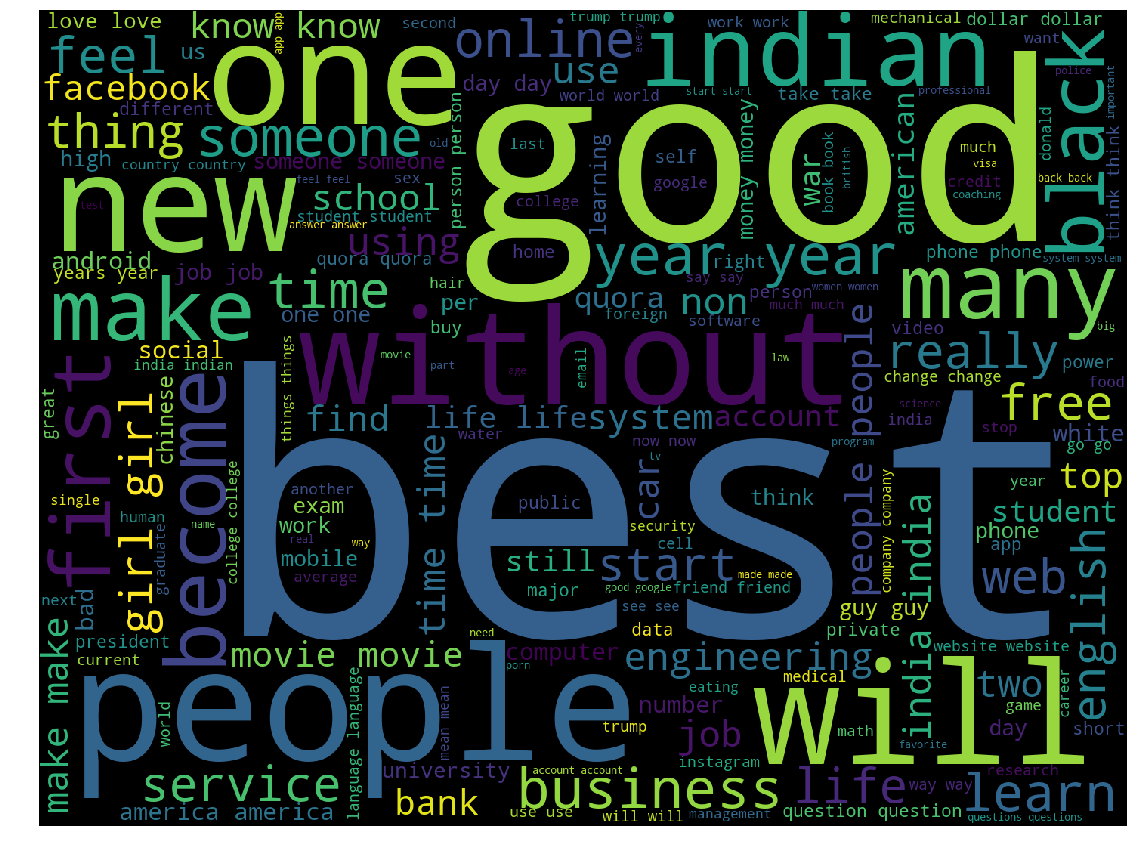

In [23]:
#wordcloud using bigram word bag
nwords = nvectorizer.get_feature_names()
cloud = WordCloud(width=1440, height=1080).generate(" ".join(nwords))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [24]:
#ngram TFIDF
ntfidf_vect = TfidfVectorizer(ngram_range=(2,2), max_features = 50000)
ntfidf_vect.fit( pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique() )
ntfidf_train_1 = ntfidf_vect.transform(train_data['question1'])
ntfidf_train_2 = ntfidf_vect.transform(train_data['question2'])

ntfidf_test_1 = ntfidf_vect.transform(test_data['question1'])
ntfidf_test_2 = ntfidf_vect.transform(test_data['question2'])



nsimilarity_train = []

for i in range(0, ntfidf_train_1.shape[0]):
    nsimilarity_train.append(cosine_similarity(ntfidf_train_1[i], ntfidf_train_2[i]))


nsimilarity_test = []

for i in range(0, ntfidf_test_1.shape[0]):
    nsimilarity_test.append(cosine_similarity(ntfidf_test_1[i], ntfidf_test_2[i]))
    


In [25]:
naccuracy_train = []data.head()
for i in x:
    naccuracy_train.append(accuracy(nsimilarity_train, train_data, i))

naccuracy_test = []

for i in x:
    naccuracy_test.append(accuracy(nsimilarity_test, test_data, i))
    

   

Threshold      naccuracy_train     naccuracy_test
0.000000       39.490747            39.827022                
0.071429       39.798165            40.131259                
0.142857       40.127843            40.366239                
0.214286       40.139504            40.390149                
0.285714       39.880143            40.111471                
0.357143       39.552231            39.751169                
0.428571       39.139514            39.244931                
0.500000       38.611251            38.754359                
0.571429       38.147652            38.263788                
0.642857       37.879457            37.844122                
0.714286       37.693947            37.802073                
0.785714       38.140938            38.003248                
0.857143       39.108066            38.904417                
0.928571       40.770946            40.536908                
1.000000       63.132546            62.958108                


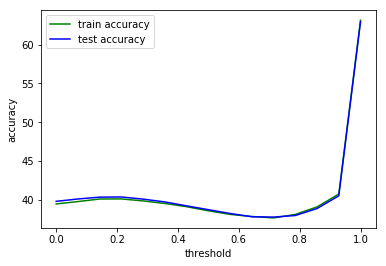

In [26]:
print("Threshold      naccuracy_train     naccuracy_test")    
for i in range(len(x)):
     print("{:<15f}{:<20f} {:<25f}".format(x[i], naccuracy_train[i] ,naccuracy_test[i] ))
        

   
plt.plot(x,naccuracy_train, color='green', label='train accuracy')
plt.plot(x,naccuracy_test, color='blue', label='test accuracy')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:

nf1_score_train = []

for i in x:
    
    print("Threshold: {:f}".format(i))
    
    predictions = list( [ 1 if y>i else 0 for y in nsimilarity_train] )
    
    acc = accuracy_score(predictions ,train_data['is_duplicate'].values )
    print("Accuracy : {:f}".format(acc*100))
    
    cm = confusion_matrix(predictions ,train_data['is_duplicate'].values )
    print("Confusion Matrix")
    print(cm)
    
    f1 = f1_score(predictions ,train_data['is_duplicate'].values, average='macro')
    print("F1 Score: {:f}\n\n".format(f1))
    
    nf1_score_train.append(f1)

Threshold: 0.000000
Accuracy : 39.490747
Confusion Matrix
[[ 12701   5277]
 [165966  99059]]
F1 Score: 0.332779


Threshold: 0.071429
Accuracy : 39.798165
Confusion Matrix
[[ 14919   6625]
 [163748  97711]]
F1 Score: 0.341636


Threshold: 0.142857
Accuracy : 40.127843
Confusion Matrix
[[ 18560   9333]
 [160107  95003]]
F1 Score: 0.354157


Threshold: 0.214286
Accuracy : 40.139504
Confusion Matrix
[[ 22143  12883]
 [156524  91453]]
F1 Score: 0.363199


Threshold: 0.285714
Accuracy : 39.880143
Confusion Matrix
[[ 25908  17382]
 [152759  86954]]
F1 Score: 0.369463


Threshold: 0.357143
Accuracy : 39.552231
Confusion Matrix
[[ 30425  22827]
 [148242  81509]]
F1 Score: 0.375163


Threshold: 0.428571
Accuracy : 39.139514
Confusion Matrix
[[ 35457  29027]
 [143210  75309]]
F1 Score: 0.379082


Threshold: 0.500000
Accuracy : 38.611251
Confusion Matrix
[[ 41014  36079]
 [137653  68257]]
F1 Score: 0.380371


Threshold: 0.571429
Accuracy : 38.147652
Confusion Matrix
[[ 47751  44128]
 [130916  602

In [28]:
nf1_score_test = []

for i in x:
    
    print("Threshold: {:f}".format(i))
    
    predictions = list( [ 1 if y>i else 0 for y in nsimilarity_test] )
    
    acc = accuracy_score(predictions ,test_data['is_duplicate'].values )
    print("Accuracy : {:f}".format(acc*100))
    
    cm = confusion_matrix(predictions ,test_data['is_duplicate'].values )
    print("Confusion Matrix")
    print(cm)
    
    f1 = f1_score(predictions ,test_data['is_duplicate'].values, average='macro')
    print("F1 Score: {:f}\n\n".format(f1))
    
    nf1_score_test.append(f1)

Threshold: 0.000000
Accuracy : 39.827022
Confusion Matrix
[[ 5709  2331]
 [70651 42596]]
F1 Score: 0.336941


Threshold: 0.071429
Accuracy : 40.131259
Confusion Matrix
[[ 6662  2915]
 [69698 42012]]
F1 Score: 0.345734


Threshold: 0.142857
Accuracy : 40.366239
Confusion Matrix
[[ 8139  4107]
 [68221 40820]]
F1 Score: 0.356976


Threshold: 0.214286
Accuracy : 40.390149
Confusion Matrix
[[ 9658  5597]
 [66702 39330]]
F1 Score: 0.365954


Threshold: 0.285714
Accuracy : 40.111471
Confusion Matrix
[[11228  7505]
 [65132 37422]]
F1 Score: 0.371815


Threshold: 0.357143
Accuracy : 39.751169
Confusion Matrix
[[13079  9793]
 [63281 35134]]
F1 Score: 0.376908


Threshold: 0.428571
Accuracy : 39.244931
Confusion Matrix
[[15140 12468]
 [61220 32459]]
F1 Score: 0.379804


Threshold: 0.500000
Accuracy : 38.754359
Confusion Matrix
[[17553 15476]
 [58807 29451]]
F1 Score: 0.381593


Threshold: 0.571429
Accuracy : 38.263788
Confusion Matrix
[[20357 18875]
 [56003 26052]]
F1 Score: 0.381274


Threshold:

Threshold          nf1_score_train       nf1_score_test 
0.000000            0.332779             0.336941            
0.071429            0.341636             0.345734            
0.142857            0.354157             0.356976            
0.214286            0.363199             0.365954            
0.285714            0.369463             0.371815            
0.357143            0.375163             0.376908            
0.428571            0.379082             0.379804            
0.500000            0.380371             0.381593            
0.571429            0.380276             0.381274            
0.642857            0.378652             0.378373            
0.714286            0.373029             0.374479            
0.785714            0.367402             0.366828            
0.857143            0.360717             0.360220            
0.928571            0.358803             0.358598            
1.000000            0.387002             0.386345            


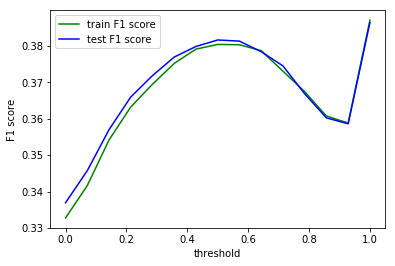

In [29]:
print("Threshold          nf1_score_train       nf1_score_test ")

for i in range(len(x)):
     print("{:<20f}{:<20f} {:<20f}".format(x[i], nf1_score_train[i] , nf1_score_test[i] ))

plt.plot(x, nf1_score_train, color='green', label='train F1 score')
plt.plot(x, nf1_score_test, color='blue', label='test F1 score')
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.legend()
plt.show()

In [30]:



import pickle
f = open('ntfidf_vec.pickle', 'wb')
pickle.dump(ntfidf_vect, f)
f.close()

import pickle
f = open('tfidf_vec.pickle', 'wb')
pickle.dump(tfidf_vect, f)
f.close()






In [31]:
list1 = test_data['question1'].values
list2 = test_data['question2'].values
q1 = "what is my name?"
q2 = "what is my name?"
for i in range(0,10):
    print(list1[i])
    print(list2[i])
    print(cosine_similarity( tfidf_vect.transform([list1[i]]) , tfidf_vect.transform([list2[i]])))
    print()
print(cosine_similarity( tfidf_vect.transform([q1]) , tfidf_vect.transform([q2])))

are we near world war 3?
is world war 3 closer than it has ever been?
0.6699537948871859

what are the best doctor doom stories?
what are the best comics featuring doctor doom?
0.3548116321197492

why are newton  rings circular in shape? why not square or any other shape?
why is a circular ring pattern obtained in newton  ring method?
0.7209587052302411

how does wikipedia ensure content quality / authenticity is maintained?
how does wikipedia keep content quality high?
0.4776958252585486

height: how would a 14 year old increase his height?
how should i increase my height?
0.3405338737335667

how many people do you have sex with?
how many partners have you slept with?
0.6107640795295067

why is china blocking the move at un to ban masood azhar as terrorist?
why does china block sanctions at the un against the jaish-e-mohammad (jem) chief, masood azhar?
0.5604034300584334

how can i forget someone i love strongly?
how do i forget the person i love the most?
0.4978036473474574

what is 